In [22]:
## Monte Carlo Method to extimate PI and numerical analysis.
## We numerically check the sig/sqrt(n) error. 

import matplotlib.pyplot as plt
import numpy as np
import random

In [23]:
##Estimate the value of Pi
def estimate_pi(num_points):
    inside_circle = 0

    for _ in range(num_points):
        # Generate random x and y coordinates between -1 and 1
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        
        # Check if the point is inside the unit circle
        if x**2 + y**2 <= 1:
            inside_circle += 1

    # Estimate of pi
    pi_estimate = (inside_circle / num_points) * 4
    return pi_estimate

# Number of points for the simulation
num_points = 10  # Increase this for better accuracy
pi_approx = estimate_pi(num_points)
true_pi = np.pi
print(f"Estimated value of pi: {pi_approx}")

Estimated value of pi: 3.2


In [24]:
# Define a range of point counts (increasing values)
num_points_list = [i for i in range(10,1000,10)]
pi_estimates = []
pi_estimates_errors = []
# Calculate the error for each point count
for num_points in num_points_list:
    pi_estimate = estimate_pi(num_points)
    pi_estimate_error = estimate_pi(num_points)-np.pi
    pi_estimates.append(pi_estimate)
    pi_estimates_errors.append(pi_estimate_error)

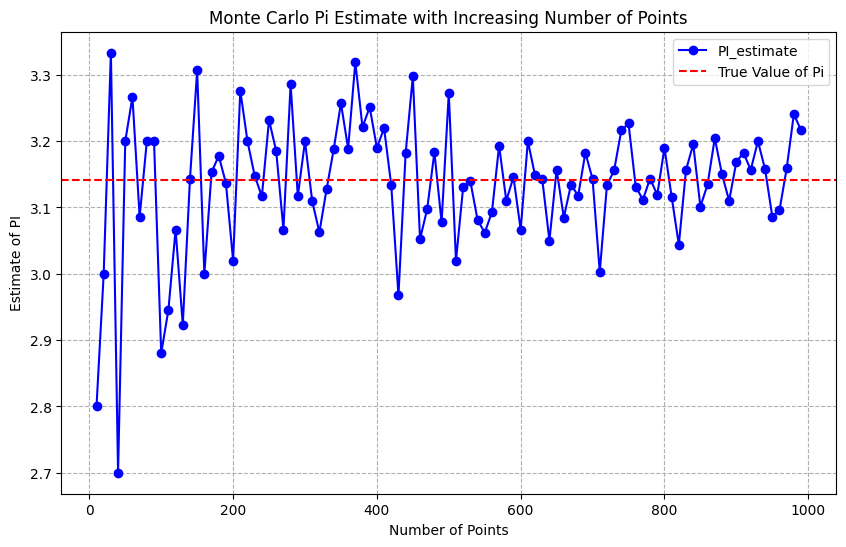

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(num_points_list, pi_estimates, marker='o', linestyle='-', color='b', label='PI_estimate')
plt.axhline(true_pi, color='red', linestyle='--', label="True Value of Pi")
plt.xlabel("Number of Points")
plt.ylabel("Estimate of PI")
plt.title("Monte Carlo Pi Estimate with Increasing Number of Points")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

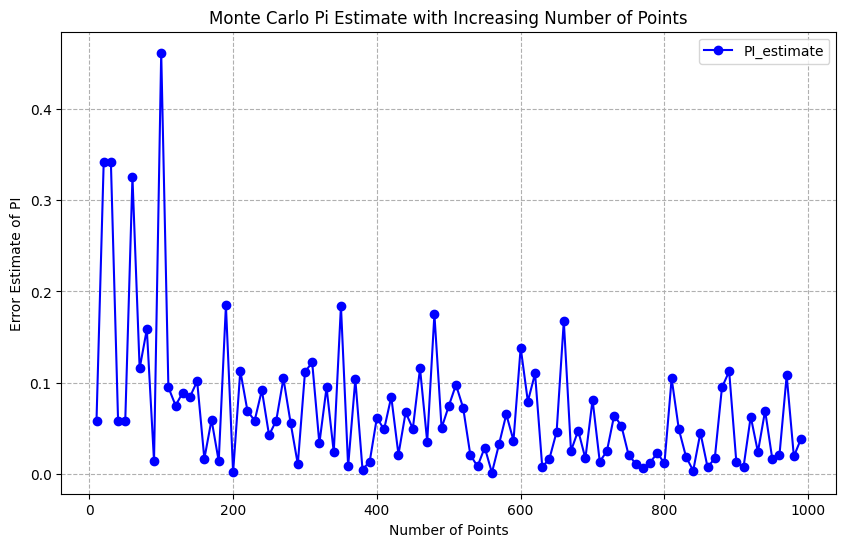

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(num_points_list, np.abs(pi_estimates_errors), marker='o', linestyle='-', color='b', label='PI_estimate')
plt.xlabel("Number of Points")
plt.ylabel("Error Estimate of PI")
plt.title("Monte Carlo Pi Estimate with Increasing Number of Points")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [14]:
# Define a range of point counts (increasing values)
num_points_list = [10, 100, 1000, 10000, 50000, 100000, 500000, 1000000, 5000000]
errors = []
true_pi = np.pi

# Calculate the error for each point count
for num_points in num_points_list:
    pi_estimate = estimate_pi(num_points)
    error = abs(pi_estimate - true_pi)
    errors.append(error)

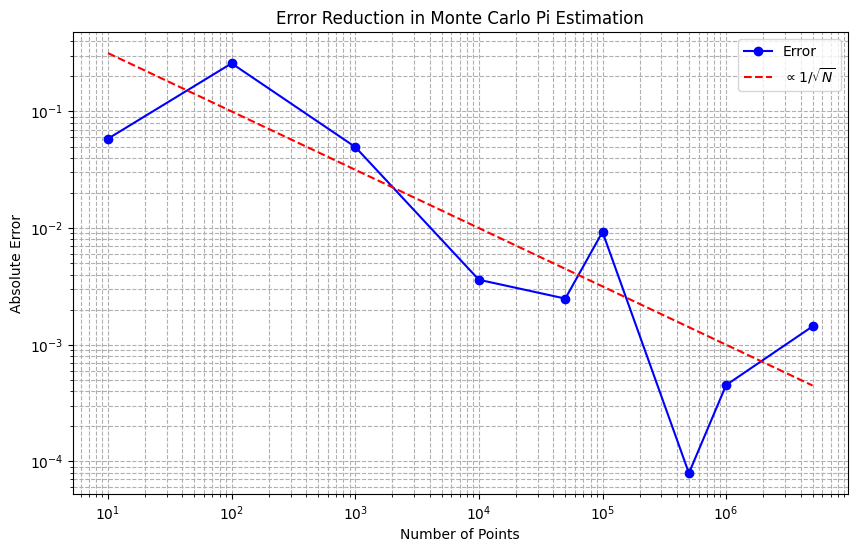

In [15]:
# Plotting the results on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(num_points_list, errors, marker='o', linestyle='-', color='b', label='Error')

# Plotting the expected error reduction line (O(1/sqrt(N)))
expected_errors = [1 / np.sqrt(n) for n in num_points_list]
plt.loglog(num_points_list, expected_errors, linestyle='--', color='r', label=r'$\propto 1/\sqrt{N}$')

plt.xlabel("Number of Points")
plt.ylabel("Absolute Error")
plt.title("Error Reduction in Monte Carlo Pi Estimation")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


In [16]:
def monte_carlo_pi_integral(num_points):
    total_sum = 0
    for _ in range(num_points):
        # Generate a random point in [0, 1]
        x = random.uniform(0, 1)
        # Evaluate the function 4 / (1 + x^2)
        total_sum += 4 / (1 + x**2)
    # Estimate of the integral (mean of function values)
    return total_sum / num_points

In [47]:
# Define a range of point counts (increasing values)
num_points_list = [10, 100, 1000, 10000, 100000, 1000000]
errors = []
true_pi = np.pi

# Calculate the error for each point count
for num_points in num_points_list:
    pi_estimate = monte_carlo_pi_integral(num_points)
    error = abs(pi_estimate - true_pi)
    errors.append(error)

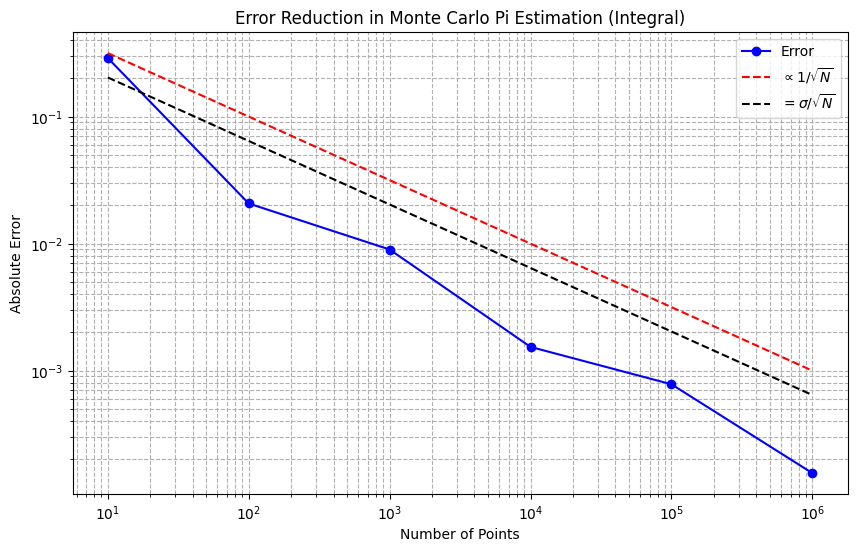

In [48]:
# Plotting the results on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(num_points_list, errors, marker='o', linestyle='-', color='b', label='Error')

# Plotting the expected error reduction line O(1/sqrt(N))
expected_errors = [1 / np.sqrt(n) for n in num_points_list]
plt.loglog(num_points_list, expected_errors, linestyle='--', color='r', label=r'$\propto 1/\sqrt{N}$')

# Plotting the expected error reduction line sig/sqrt(N)
expected_errors_sig = [np.sqrt(4+2*np.pi-np.pi*np.pi) / np.sqrt(n) for n in num_points_list]
plt.loglog(num_points_list, expected_errors_sig, linestyle='--', color='black', label=r'$= \sigma/\sqrt{N}$')

plt.xlabel("Number of Points")
plt.ylabel("Absolute Error")
plt.title("Error Reduction in Monte Carlo Pi Estimation (Integral)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

In [25]:
estimates_1000 = [monte_carlo_pi_integral(1000) for _ in range(10000)]

In [26]:
error_1000 = [val - np.pi for val in estimates_1000]

NameError: name 'num_trials' is not defined

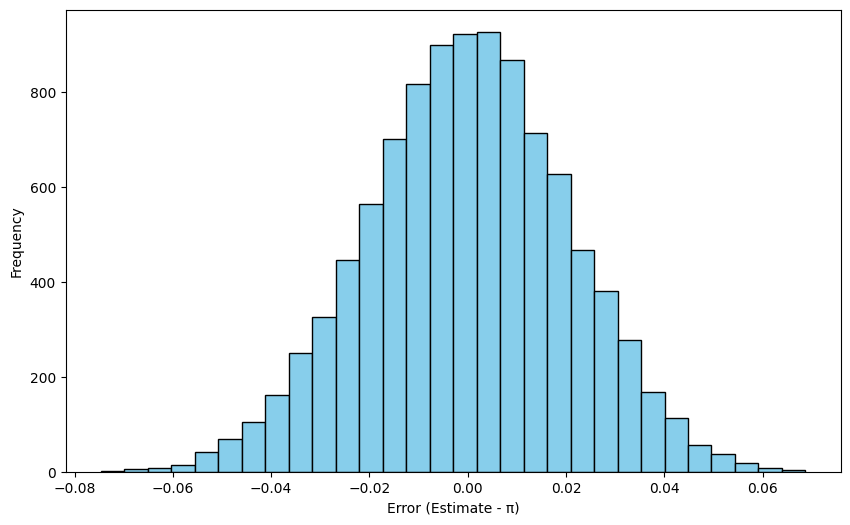

In [27]:
# Plotting the histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(error_1000, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Error (Estimate - π)")
plt.ylabel("Frequency")
plt.title(f"Histogram of Errors in Pi Estimation (N={num_points} points, {num_trials} trials)")
plt.axvline(0, color='red', linestyle='--', label="True Value of π")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [28]:
np.std(error_1000)

0.02050687597420831

In [53]:
1/np.sqrt(1000)*np.sqrt(4+2*np.pi-np.pi*np.pi)

0.020336688670730744

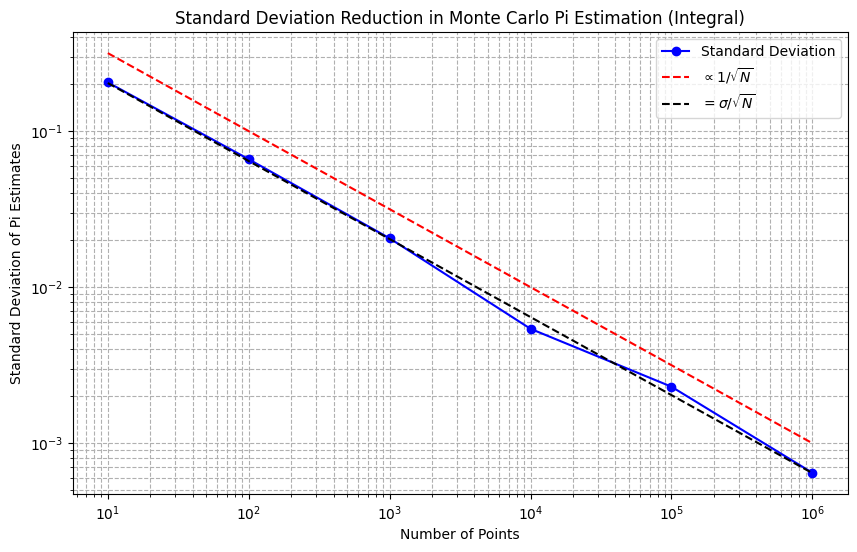

In [54]:
num_trials = 100
std_devs = []
# Calculate standard deviation for each point count
for num_points in num_points_list:
    estimates = [monte_carlo_pi_integral(num_points) for _ in range(num_trials)]
    std_dev = np.std(estimates)  # Standard deviation of estimates
    std_devs.append(std_dev)

# Plotting the standard deviation on a log-log scale
plt.figure(figsize=(10, 6))
plt.loglog(num_points_list, std_devs, marker='o', linestyle='-', color='b', label='Standard Deviation')

# Expected standard deviation reduction line (O(1/sqrt(N)))
expected_std_dev = [1 / np.sqrt(n) for n in num_points_list]
plt.loglog(num_points_list, expected_std_dev, linestyle='--', color='r', label=r'$\propto 1/\sqrt{N}$')

# Plotting the expected error reduction line sig/sqrt(N)
expected_errors_sig = [np.sqrt(4+2*np.pi-np.pi*np.pi) / np.sqrt(n) for n in num_points_list]
plt.loglog(num_points_list, expected_errors_sig, linestyle='--', color='black', label=r'$= \sigma/\sqrt{N}$')

plt.xlabel("Number of Points")
plt.ylabel("Standard Deviation of Pi Estimates")
plt.title("Standard Deviation Reduction in Monte Carlo Pi Estimation (Integral)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()